In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random

import h5py
from IPython.utils import io

In [2]:
%matplotlib notebook

In [3]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *

In [4]:
%reload_ext autoreload
%autoreload 2

In [7]:
bdf_discharge = load_dir(dirname='/data/new_trap/20200320/Bead1/Discharge/Recharge/', max_file=700)
# bdf_discharge = load_dir(dirname='/data/new_trap/20200320/Bead1/Discharge/From_plus_to_minus_and_discharge/'
#                          ,start_file=0, max_file=1500)

No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data


No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data


In [9]:
dis_z = [np.std(bb.response_at_freq2('z', drive_freq=71)) for bb in  bdf_discharge]
names = [bb.fname for bb in bdf_discharge]
# dis_x = [np.std(bb.response_at_freq2('x', drive_freq=71)) for bb in  bdf_discharge]
# dis_y = [np.std(bb.response_at_freq2('y', drive_freq=71)) for bb in  bdf_discharge]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [10]:
# offset = np.mean(dis_z[80:120])
# stepz = (np.mean(dis_z2[50:64]))/8#-np.mean(dis_z2[75:84]))/2
stepz = 35

In [35]:
bdf_discharge[479].fname

'/data/new_trap/20200320/Bead1/Discharge/From_plus_to_minus_and_discharge/Discharge_539.h5'

<IPython.core.display.Javascript object>


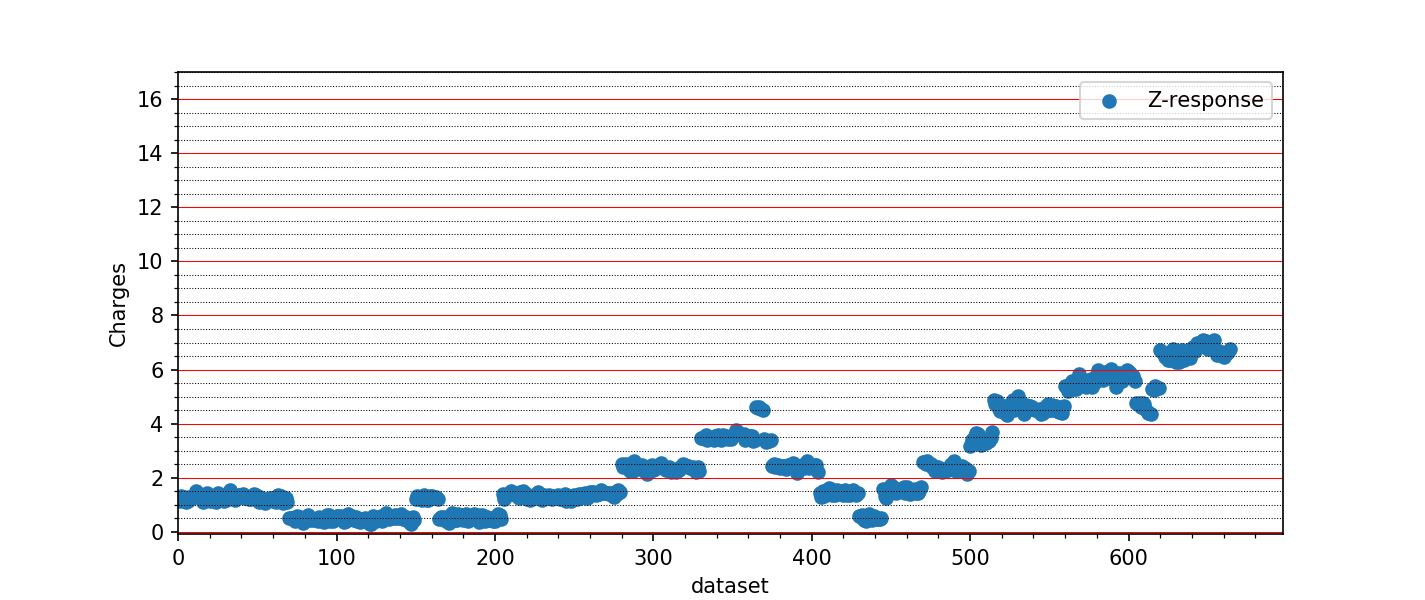

In [11]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.scatter(range(len(dis_z)),np.array(dis_z)/34-0.5,label='Z-response')
ax.set(xlabel='dataset', ylabel='Charges', ylim=(None,17), xlim=(0,None))
ax.minorticks_on()
# Customize the major grid
ax.grid(axis='y', which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
ax.grid(axis='y', which='minor', linestyle=':', linewidth='0.5', color='black')
ax.legend()

In [47]:
dis_z_time = [bb.response_at_freq2('z', drive_freq=71) for bb in  bdf_discharge]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


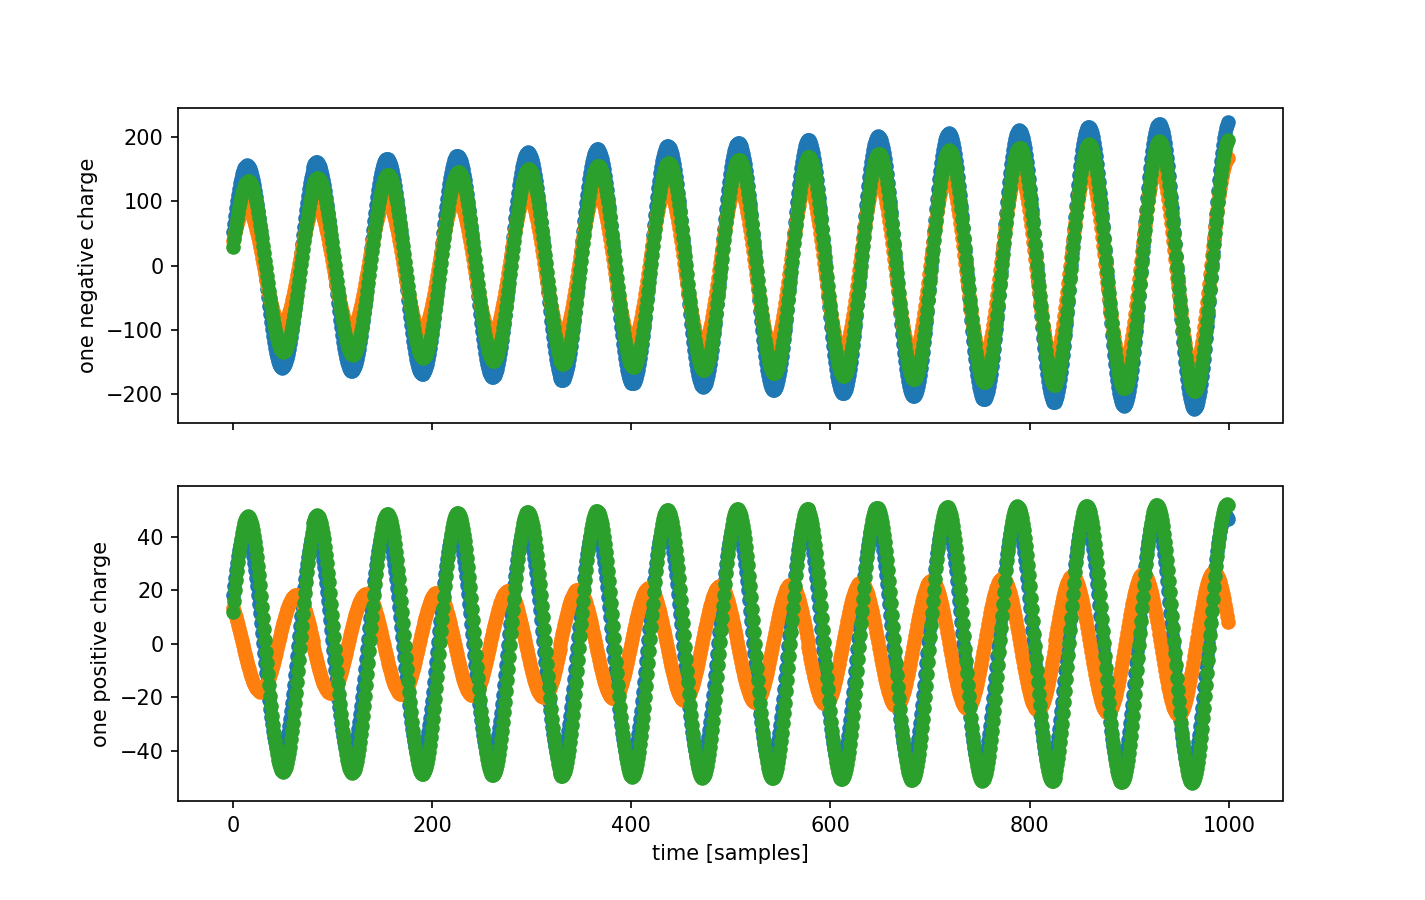

[Text(0, 0.5, 'one positive charge'), Text(0.5, 0, 'time [samples]')]

In [51]:
_,ax = plt.subplots(2,1,figsize=(9.5,6), sharex=True)
[ax[0].scatter(range(1000), dis_z_time[i][:1000]) for i in range(377,380)]
ax[0].set(ylabel='one negative charge')
[ax[1].scatter(range(1000), dis_z_time[i][:1000]) for i in range(533,536)]
ax[1].set(ylabel='one positive charge', xlabel='time [samples]')

<IPython.core.display.Javascript object>


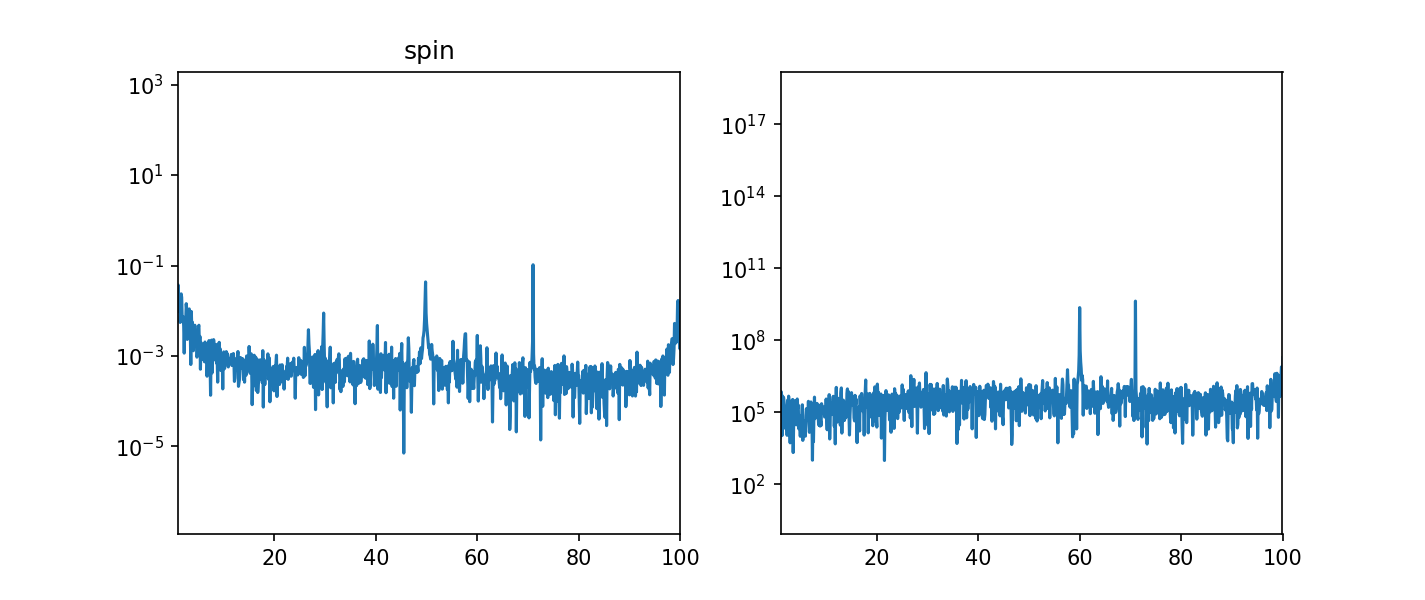

[(1, 100), Text(0.5, 1.0, 'spin')]

In [46]:
bb = bdf_discharge[311]
x = bb.spin_data

fft = np.abs(np.fft.rfft(x,norm='ortho'))
freq = np.fft.rfftfreq(len(x), d=1./50000)

_,ax = plt.subplots(1,2,figsize=(9.5,4), sharex=True)
ax[0].semilogy(freq, fft)
ax[1].semilogy(*bb.psd2('z'))
ax[0].set(xlim=(1,100), title='spin')

In [79]:
bdf_mass = load_dir(dirname='/data/new_trap/20200320/Bead1/Mass/',
                    start_file=21, max_file=100)

41  files in folder
20  files loaded


In [18]:
bdf_mass = bdf_discharge[190:200]

### Mass measurement

In [81]:
bb = bdf_mass[0]
charges = 15
force = charges * 1.6e-19 * 20 / 8.6e-3 * 0.63  # in Newtons

# t_short = 1
# fsamp = 500
# freq = 10
# amp = force
# dt = 1. / fsamp
# nsamp = int(t_short / dt)
# time = np.arange(nsamp) * dt
# sig = amp * np.sin(2 * np.pi * freq * time)

<IPython.core.display.Javascript object>


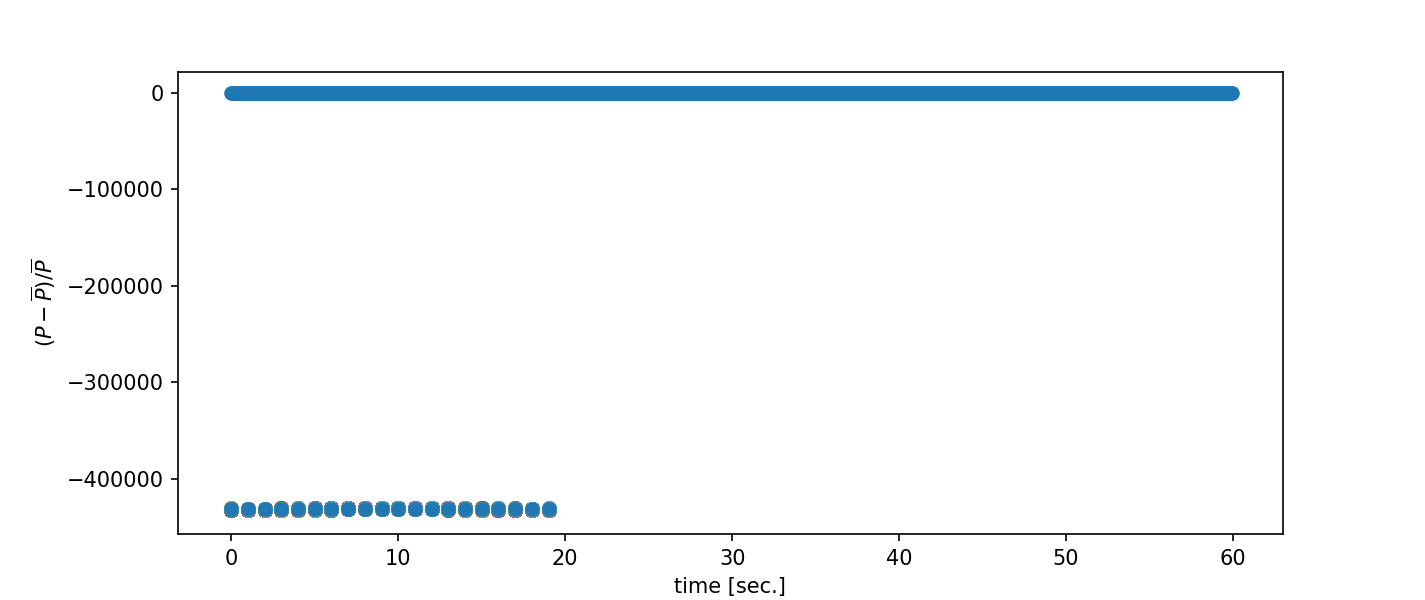

mass in pg:  200.0254044117734
power decrease [%] (peak to valley):  0.3587584164782665
force:  3.5162790697674416e-15


In [85]:
nroll = 13
ff = np.roll(np.mean(bb.Iz.reshape(1200,-1), axis=1), nroll)
_, ax = plt.subplots(figsize=(9.5,4))
ax.scatter(np.arange(1200)*1/20, (ff-np.mean(ff))/np.mean(ff))
# ax.scatter(range(500), (sig-np.mean(sig))/np.std(sig))
ax.set(ylabel=r'$(P-\overline{P})/\overline{P}$', xlabel='time [sec.]')
print('mass in pg: ', 2*np.mean(ff)/(np.min(ff)-np.max(ff))*force/9.8*1e15) 
print('power decrease [%] (peak to valley): ', 100*(np.min(ff)-np.max(ff))/np.mean(ff))
print('force: ', force)

In [76]:
bb = bdf_mass[0]

data = bb.Iz[10000:40000]
data = data/np.mean(data)
t = np.arange(len(data))*1/5000.

optimize_func = lambda x: x[0]*np.sin(2*np.pi*t*[1]+x[2]) - data
est_amp, est_freq, est_phase = leastsq(optimize_func, [0.1, 1, 3])[0]
print(est_amp, est_freq, est_phase)
print(-1/est_amp*force/9.8*1e15)

-0.0011441823201128387 1.0 1.6829563989811105
539.3745789412255


### Another method

In [86]:
from scipy.optimize import leastsq
## assuming 1Hz, 10V amplitude
def get_mass(bb, charges):
    ff = np.mean(bb.Iz.reshape(1200,-1), axis=1)
    force = charges * 1.6e-19 * 20 / 8.6e-3 * 0.63  # in Newtons
    masses = []
    for i in range(5,55):
        subset = ff[i*20:(i+1)*20]
        masses.append(2*np.mean(subset)/(np.min(subset)-np.max(subset))*force/9.8*1e15)
        ax.scatter(range(len(subset)), subset)
    return masses

def get_mass2(bb, charges):
    force = charges * 1.6e-19 * 20 / 8e-3 * 0.63  # in Newtons
    data = bb.Iz[10000:40000]
    data = data/np.mean(data)
    t = np.arange(len(data))*1/5000.

    optimize_func = lambda x: x[0]*np.sin(2*np.pi*t*[1]+x[2]) - data
    est_amp, est_freq, est_phase = leastsq(optimize_func, [0.1, 1, 3])[0]
    return -1/est_amp*force/9.8*1e15

In [91]:
charges = 15
mass_mean = [np.mean(get_mass(bb, charges=charges)[0]) for bb in bdf_mass]
mass_std = np.std([np.mean(get_mass(bb, charges=charges)[0]) for bb in bdf_mass])

<IPython.core.display.Javascript object>


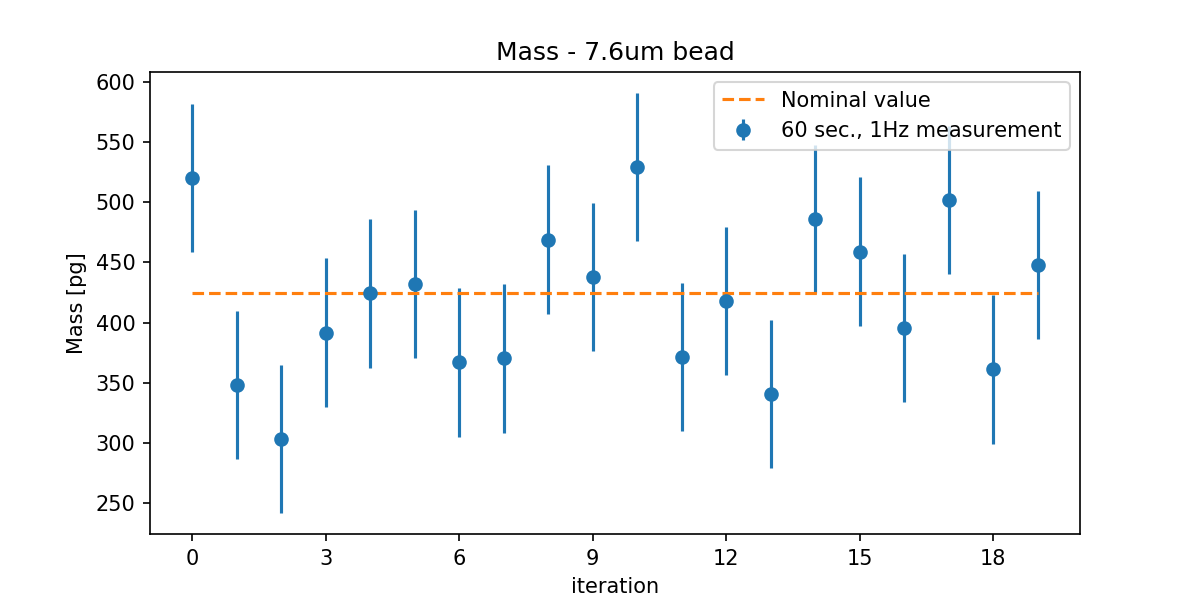

In [110]:
from matplotlib.ticker import MaxNLocator

_,ax = plt.subplots(figsize=(8,4))
ax.errorbar(range(20), mass_mean, yerr=mass_std/np.sqrt(1), fmt='o', label='60 sec., 1Hz measurement')
ax.plot(range(20), np.arange(20)*0+425, '--', label='Nominal value')
ax.legend()
ax.set(title='Mass - 7.6um bead', ylabel='Mass [pg]', xlabel='iteration')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

In [ ]:
np.mean([np.mean(get_mass(bb, charges=charges)[0]) for bb in bdf_mass]), 1/np.sqrt(50)*np.std([np.mean(get_mass(bb, charges=charges)[0]) for bb in bdf_mass])

In [15]:
charges = 30
np.mean([np.mean(get_mass(bb, charges=charges)[0]) for bb in bdf_mass]), np.mean([get_mass2(bb, charges=charges) for bb in bdf_mass])

(625.0848164732251, -665.1035644961291)

In [100]:
np.std([np.mean(get_mass(bb, charges=charges)[0]) for bb in bdf_mass]), np.std([get_mass2(bb, charges=charges) for bb in bdf_mass])

(32.88947418454064, 10.193512628859269)